In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = True

# We want to first determine the density of the mixture of the reactor inlet fluid

## Step 1: Calculate the average molar mass of the fluid $M_{AVG} \, [\frac{g}{mol}] $

$$
M_{AVG} = (\sum_{i = \text{fluid components}} x_i M_i) \, [\frac{g}{mol}]
$$ 

where 

$M_{AVG}$ is the average molar mass of the fluid $[\frac{g}{mol}]$

$x_i$ is the molar fraction of component $i$ $[n.d]$

$M_i$ is the molar mass of component $i$ $[\frac{g}{mol}]$

In [2]:
# Molar masses in g/mol from NIST or wikipedia
molar_masses = {
    'BENZE-01': 78.11,
    'TOLUE-01': 92.14,
    'M-XYL-01': 106.17,
    'P-XYL-01': 106.17,
    '2-MET-01': 86.18,
    'HYDRO-01': 2.02,
    'METHA-01': 16.04,
}

# Molar fractions [n.d] from Aspen Plus
molar_fractions_liquid = {
    'BENZE-01': 0.987153092675232,
    'TOLUE-01': 0.0100656858775016,
    'M-XYL-01': 5.93682601102733e-08,
    'P-XYL-01': 6.29569608461183e-14,
    '2-MET-01': 0.000214487661851108,
    'HYDRO-01': 3.28438706388267e-06,
    'METHA-01': 0.00256339003002829,
}

molar_fractions_gas = {
    'BENZE-01': 1.80e-05,
    'TOLUE-01': 1.37e-07,
    'M-XYL-01': 2.28E-13,
    'P-XYL-01': 2.80E-19,
    '2-MET-01': 6.27E-08,
    'HYDRO-01': 0.999696367,
    'METHA-01': 0.000256509
}

# Calculate average molar mass
M_avg_liquid = sum(molar_fractions_liquid[component] 
                   * molar_masses[component] for component in molar_fractions_liquid) # g / mol

M_avg_gas = sum(molar_fractions_gas[component] 
                * molar_masses[component] for component in molar_fractions_gas) # g / mol



print(f"Average Molar Mass of the liquid Mixture: {M_avg_liquid:.5f} [g/mol]")

print(f"Average Molar Mass of the gas Mixture: {M_avg_gas:.5f} [g/mol]")

Average Molar Mass of the liquid Mixture: 78.09359 [g/mol]
Average Molar Mass of the gas Mixture: 2.02493 [g/mol]


## We know that the density of the mixture from Aspen plus  $\rho_{fluid} \, [\frac{mol}{cm^3}]$

In [3]:
# Given liquid mixture density in mol/cm^3
rho_liquid_mixture_mol_cc = 0.00934292029755189

print(f"Density of the liquid Mixture: {rho_liquid_mixture_mol_cc :.5f} [mol/cm^3]")

# Given gas mixture density in mol / cm^3
rho_gas_mixture_mol_cc = 0.001421178

print(f"Density of the gas Mixture: {rho_gas_mixture_mol_cc :.5f} [mol/cm^3]")

Density of the liquid Mixture: 0.00934 [mol/cm^3]
Density of the gas Mixture: 0.00142 [mol/cm^3]


## Step 2: Convert density of the mixture from $[\frac{mol}{cm^3}]$ to $[\frac{g}{cm^3}]$

$$
\rho_{fluid} [\frac{g}{cm^3}]  = \rho_{fluid} [\frac{mol}{cm^3}] \cdot M_{AVG} [\frac{g}{mol}]
$$

In [4]:
# Convert liquid and gas mixture density to g/cc
rho_liquid_mixture_g_cc = rho_liquid_mixture_mol_cc * M_avg_liquid
rho_gas_mixture_g_cc = rho_gas_mixture_mol_cc * M_avg_gas


print(f"Density of the liquid mixture: {rho_liquid_mixture_g_cc :.5f} [g/cm^3] = \
{rho_liquid_mixture_g_cc* 1000:.5f} [kg / m^3]")

print(f"Density of the gas mixture: {rho_gas_mixture_g_cc :.5f} [g/cm^3] = \
{rho_gas_mixture_g_cc* 1000:.5f} [kg / m^3]")

Density of the liquid mixture: 0.72962 [g/cm^3] = 729.62223 [kg / m^3]
Density of the gas mixture: 0.00288 [g/cm^3] = 2.87778 [kg / m^3]


# We want to determine the density of catalyst particle

## Step 1: Calculate the average density of the catalyst solid $\rho_{ABS} \, [\frac{g}{cm^3}]$

$$
\rho_{ABS} = (\sum_{i = \text{catalyst components}} w_i \rho_i) \, [\frac{g}{cm^3}]
$$ 

where 

$\rho_{ABS}$ is the average density of the catalyst solid $[\frac{g}{cm^3}]$

$w_i$ is the weight fraction of component $i$ $[n.d]$

$\rho_i$ is the density of component $i$ $[\frac{g}{cm^3}]$

In [5]:
# Density in g / cm^3 from (https://physics.nist.gov/PhysRefData/XrayMassCoef/tab1.html)
densities = {
    'Li': 5.34e-1,
    'Al': 2.699,
    'Zn': 7.133,
    'Ru': 1.241e1
}

# Weight fraction [wt %] estimated from (https://doi.org/10.1002/cctc.202200125)
weight_fraction = {
    'Li': 60.93,
    'Al': 32.93,
    'Zn': 4.94,
    'Ru': 1.20
}

# Calculate average density of solid
rho_abs = sum(densities[component] * weight_fraction[component] for component in weight_fraction) # g/cm^3

print(f"Average density of catalyst solid: {rho_abs:.5f} [g/cm^3]")

Average density of catalyst solid: 171.54371 [g/cm^3]


## Assumption: catalyst voids are not empty and are filled with fluid mixture

## Step 2: Calculate the density of catalyst voids $\rho_{void} \, [\frac{g}{cm^3}]$


$$
\rho_{void} = \rho_{fluid} \, [\frac{g}{cm^3}]
$$

where 

$\rho_{fluid}$ is the density of the mixture $[\frac{g}{cm^3}]$

$\rho_{void}$ is the density of the catalyst voids $[\frac{g}{cm^3}]$


In [6]:
# Calculate density of voids (Assuming it is filled with liquids)
rho_void = rho_liquid_mixture_g_cc # g / cm^3

print(f"Density of catalyst voids: {rho_void :.5f} [g/cm^3]")

Density of catalyst voids: 0.72962 [g/cm^3]


## Step 3: Calculate the average density of catalyst $\rho_{cat} \, [\frac{g}{cm^3}]$ with respect to catalyst porosity $\varepsilon_p \, [n.d]$

$$
\rho_{AVE} = [(1 - \varepsilon_p) \rho_{ABS} + \varepsilon_p \rho_{void}] \, [\frac{g}{cm^3}]
$$

where 

$\rho_{AVE}$ is the average density of catalyst$[\frac{g}{cm^3}]$

$\rho_{ABS}$ is the average density of the catalyst solid $[\frac{g}{cm^3}]$

$\rho_{void}$ is the density of the catalyst voids $[\frac{g}{cm^3}]$

$\varepsilon_p$ is the catalyst porosity  $[n.d]$

$\varepsilon_p \in [0, 1]$




In [7]:
# Catalyst porosity ranges from 0 to 1
esp_p = np.arange(0.01, 1, 0.01)

# Calculate average density of catalyst
def cal_avg_rho_cat(esp_p, rho_void, rho_abs):
    return (1 - esp_p) * rho_abs + esp_p * rho_void



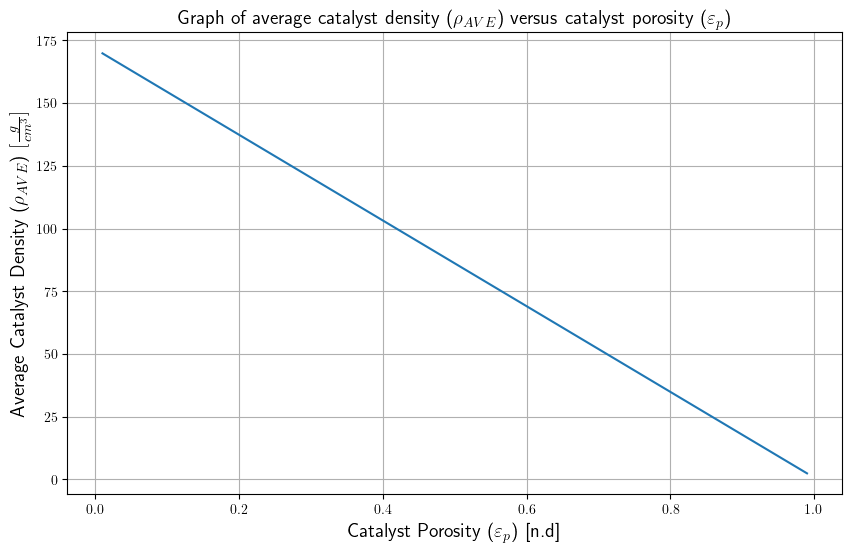

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(esp_p, cal_avg_rho_cat(esp_p, rho_void, rho_abs) , '-')

plt.xlabel(r'Catalyst Porosity ($\varepsilon_p$) [n.d]', fontsize=14)
plt.ylabel(r'Average Catalyst Density ($\rho_{AVE}$) $[\frac{g}{cm^3}]$', fontsize=14)

plt.title(r'Graph of average catalyst density ($\rho_{AVE}$) versus catalyst porosity ($\varepsilon_p$)', 
          fontsize=14)

plt.grid(True)
plt.show()

# We want to determine the difference in between the average catalyst density and the average density of the reactor inlet fluid, aka $(\rho_{cat} - \rho_{fluid})$

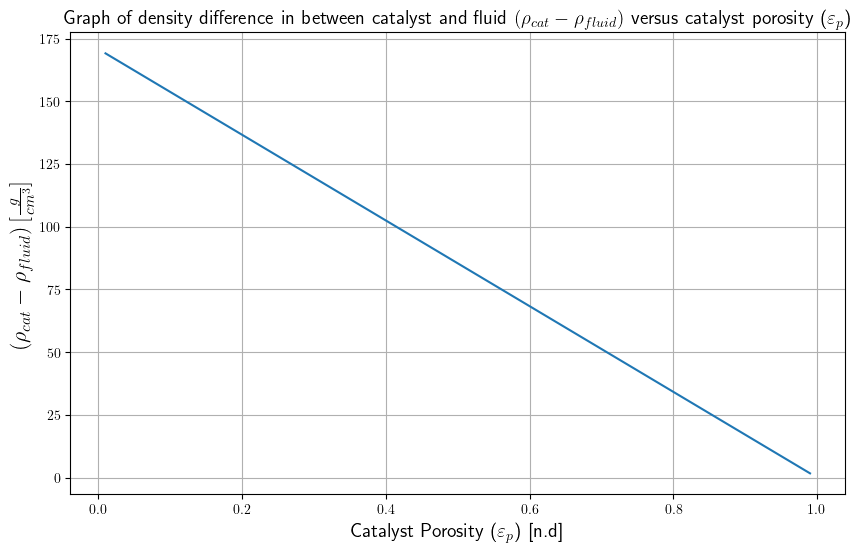

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(esp_p, cal_avg_rho_cat(esp_p, rho_void, rho_abs) - rho_liquid_mixture_g_cc , '-')

plt.xlabel(r'Catalyst Porosity ($\varepsilon_p$) [n.d]', fontsize=14)
plt.ylabel(r'$(\rho_{cat} - \rho_{fluid}) \,[\frac{g}{cm^3}]$', fontsize=16)

plt.title(r'Graph of density difference in between catalyst and fluid $(\rho_{cat} - \rho_{fluid})$ versus catalyst porosity ($\varepsilon_p$)', 
          fontsize=14)

plt.grid(True)
plt.show()

# We now want to determine the flow regime with respect to the minimum fluidization velocity of gas and liquid

## Assumptions: 

Catalyst particle diameter $(d_p)$ is $3.5 \, [mm] = 3.5 \times 10^{-3} \, [m]$

Catalyst sphericity $(\phi)$ is 1

Catalyst is non-porous such that the porosity $(\varepsilon_p)$ is 0

Thus, we know that the catalyst density $(\rho_{AVE})$ is $172 \, [\frac{g}{cm^3}] = 172 \times 10^3 \, [\frac{kg}{m^3}]$


## Model Assumptions:

We assume that the solid particles in the bed are mainly fluidized by the liquid (solids are mainly supported by the liquid). Gas is first absorbed into the liquid before diffusing onto the solid catalyst surface (no direct interaction between gas and solid). 

Thus we will use Zhang's gas-perturbed liquid model[1] where the gas occupies space with particles fluidized by liquid.

This model is applied to three-phase fluidization involving Newtonian fluids  applied to three-phase fluidization involving Newtonian liquids, equates the liquid-buoyed weight of sol- ids per unit bed volume to the frictional pressure gradient given by the Ergun packed bed equation[2] applied to the liquid-solids part of the incipiently fluidized bed. 

$$
Re_{lmf} = \sqrt{[\dfrac{150 (1 - \varepsilon_{mf})}{3.5 \phi}]^2 + \dfrac{\varepsilon_{mf}^3 (1 - \alpha_{mf})^3 Ar}{1.75}} - [\dfrac{150 (1 - \varepsilon_{mf})}{3.5 \phi}]
$$

where 

$\varepsilon_{mf}$ is the minimum fluidization voidage, where $\varepsilon_{mf} \in [0, 1]$

$\phi$ is the particle sphericity, where $\phi \in [0, 1]$

$Ar$ is the Archimedes number and from its definition, where I referred to Levenspiel chapter 3 of fluidization engineering[3], and we know it is defined as:

$$
Ar = \dfrac{d_p^2 \, \rho_{fluid} \, (\rho_{s} - \rho_{fluid}) \, g}{\mu^2}
$$

$\alpha_{mf}$ is the gas hold-up divided by the total fluid (gas+liquid) hold-up at minimum fluidization where we esimated from Yang's correlation[4], which is an empirical equation for cocurrent upward flow of gas and non-foaming liquid through fixed beds of solids, which can be written as:

$$
\alpha_{mf} = \dfrac{0.16 \, U_{gmf}}{\varepsilon_{mf} (U_{gmf} + U_{lmf})} \hspace{1cm} \text{for  } \dfrac{U_{gmf}}{U_{gmf} + U_{lmf}} \leq 0.93 \iff \dfrac{U_{gmf}}{U_{lmf}} \leq \dfrac{93}{7} \simeq 13.3
$$

where

$U_{lmf}$ is the minimum fluidization liquid velocity $[\frac{m}{s}]$

$U_{gmf}$ is the minimum fluidization gas velocity $[\frac{m}{s}]$


In particular, by Wen and Yu's two approximations[5]
which relates the minimum fluidization voidage $(\varepsilon_{mf})$ to sphericity $(\phi)$, we know that

$$
\dfrac{1}{\phi \, \varepsilon_{mf}^3} = 14 \hspace{1cm} \dfrac{1 - \varepsilon_{mf}}{\phi^2 \, \varepsilon_{mf}^3} = 11
$$

We can see that 

$$
Re_{lmf} = \sqrt{[\dfrac{150 (1 - \varepsilon_{mf})}{3.5 \phi}]^2 + \dfrac{\varepsilon_{mf}^3 (1 - \alpha_{mf})^3 Ar}{1.75}} - [\dfrac{150 (1 - \varepsilon_{mf})}{3.5 \phi}]
$$

can be simplified into 

$$
Re_{lmf} = \sqrt{33.7^2 + 0.0406 \, Ar \, (1 - \alpha_{mf})^3} - 33.7
$$


From the definition of Reynolds number and from its definition, where I referred to Fan chapter 2 of gas-liquid-solid fluidization engineering[6], and we know it is defined as 

$$
Re_{lmf} = \dfrac{d_p \, \rho_{fluid}\, U_{lmf}}{\mu}
$$

By combining the equations we have, we now have: 

$$
Re_{lmf} = \sqrt{33.7^2 + 0.0406 \, Ar \, (1 - \alpha_{mf})^3} - 33.7
$$


$$
\dfrac{d_p \, \rho_{fluid}\, U_{lmf}}{\mu} = \sqrt{33.7^2 + 0.0406 \, [\dfrac{d_p^2 \, \rho_{fluid} \, (\rho_{s} - \rho_{fluid}) \, g}{\mu^2}] \, [1 - \dfrac{0.16 \, U_{gmf}}{\varepsilon_{mf} (U_{gmf} + U_{lmf})}]^3} - 33.7
$$

We can easily observe that this is a non-linear equation and to find a relationship between $U_{lmf}$ and $U_g$, we will use a numerical scheme to find the roots of the rearranged equation

$$
(\dfrac{d_p \, \rho_{fluid}\, U_{lmf}}{\mu} + 33.7) - (33.7^2 + 0.0406 \, [\dfrac{d_p^2 \, \rho_{fluid} \, (\rho_{s} - \rho_{fluid}) \, g}{\mu^2}] \, [1 - \dfrac{0.16 \, U_{gmf}}{\varepsilon_{mf} (U_{gmf} + U_{lmf})}]^3)^{0.5} = 0
$$

## Known parameters

Catalyst particle diameter ($d_p \in [1, 6] [mm]$ from [1]

$d_p = 3.5 \times 10^{-3} \, [m]$

Minimum fluidization voidage: $\varepsilon_{mf} = (\dfrac{1}{14 \, \phi})^{\frac{1}{3}} \simeq 0.415 $

Catalyst density: $\rho_s = \rho_{AVE} = 1.72 \times 10^5 \, [\frac{kg}{m^3}]$

Liquid viscosity (obtained from Aspen simulation): $\mu = 1.7 \times 10^{-4} \, [Pa \cdot s] $ = $[\frac{kg}{m \cdot s}]$

Liquid density (obtained from Aspen simulation, same as above calculation): $\rho_{fluid} = 730 \, [\frac{kg}{m^3}]$

Gravitational acceleration: $g = 9.8 \, [\frac{m}{s^2}]$

<!-- Minimum Fluidization gas velocity range: $U_{gmf} \in [0.01, 0.18] \, [\frac{m}{s}]$ -->

In [10]:
# Parameters

# U_gmf =   # Minimum Fluidization gas velocity [m/s]

U_gmf = 0.18   # Minimum Fluidization gas velocity [m/s]

dp = 3.5e-3  # Catalyst Diameter [m]

# dp = 6e-3  # Catalyst Diameter [m]

rho_fluid = 730  # Liquid density [kg / m^3]

mu = 1.7e-4 # Liquid viscosity [kg / m / s]

rho_s = 1.72e5  # Catalyst particle density [kg / m^3]

g = 9.8  # Gravitational Acceleration [m/s^2]

epsilon_mf = 0.415  # Minimum fluidization bed voidage [n.d]

## Secant Method

We will now use the secant method that uses two initial guess and via iterating to find the root. The recurrence relation for the Secant method is:


$$
x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}
$$

where we will need two initial conditions $x_1$ and $x_0$.

In our case, we will define a function $f(U_{lmf})$ that incorporates all the parameters and $U_{gmf}$, and then apply the Secant method to find $U_{lmf}$ for a given $U_{gmf}$.

In [11]:
def f(U_lmf, U_gmf=U_gmf, dp=dp, rho_fluid=730, mu=1.7e-4, rho_s=1.72e5, g=9.8, epsilon_mf=0.415):
    """
    The function represents the rearranged non-linear equation to equate zero (root-finding)
    
    U_lmf: Dependent variable [m/s]
    
    U_gmf: Independent variable within the range [0.01, 0.18] [m/s]
    
    dp [m], rho_fluid [kg/m^3], mu [Pa.s], rho_s [kg/m^3], g[m/s^2], epsilon_mf: Known parameters.
    """
    A = dp * rho_fluid / mu
    B = 33.7**2
    C = 0.0406
    D = (dp**2 * rho_fluid * (rho_s - rho_fluid) * g) / mu**2
    E = (0.16 * U_gmf) / (epsilon_mf * (U_gmf + U_lmf))
    
    return (A * U_lmf + 33.7) - ((B + C * D * (1 - E)**3)**0.5)


In [12]:
def secant_method(f, U_gmf, dp, rho_fluid, mu, rho_s, g, epsilon_mf, x0, x1, tol=1e-5, max_iter=100):
    """
    Secant method for finding the root of f.
    
    x0, x1: Initial guesses.
    
    tol: Tolerance for the solution.
    
    max_iter: Maximum number of iterations.
    """
    
    for _ in range(max_iter):
        fx0 = f(x0, U_gmf, dp, rho_fluid, mu, rho_s, g, epsilon_mf)
        fx1 = f(x1, U_gmf, dp, rho_fluid, mu, rho_s, g, epsilon_mf)
        
        if abs(fx1 - fx0) < tol:
            print("Warning: Division by a small number. The method may not converge.")
            return None
        
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        
        if abs(x2 - x1) < tol:
            return x2
        
        x0, x1 = x1, x2
        
    print("Warning: Maximum number of iterations reached. Solution may not be accurate.")
    
    return x1


### We will use the range of the minimum fluidization velocity for gas $U_{gmf} \in [0.01, 100] \, [\frac{m}{s}]$ where x0 = 100 and x1 = 0.01 to start with.

In [13]:
# Initial guesses for U_lmf
# x0 = 0.18
x0 = 100
x1 = 0.01

### Solve and plot for $U_{lmf}$ for a range of $U_{gml}$ from  x1 [m/s] to x0 [m/s]

In [14]:
# Solve for U_lmf for a range of U_gml from 0.01 to 0.18.

U_gmf = np.arange(x1, x0, 0.001)
U_lmf = np.zeros(len(U_gmf))
counter = 0

for i in range(len(U_gmf)):
    U_lmf_solution = secant_method(f, U_gmf[i], dp, rho_fluid, mu, rho_s, g, epsilon_mf, x0, x1)
    
    #print(f"U_lmf = {U_lmf_solution:.5f} [m/s]) given U_gmf = {U_gml[i]} [m/s]")
    if ( U_gmf[i] / U_lmf_solution) > 13.3 and counter < 1: 
        print(f"Beyond U_gmf: {U_gmf[i]} [m/s], at index i {i} is not valid. \
        as U_gmf / U_lmf > 13.3")
        counter += 1
        
    U_lmf[i] = U_lmf_solution

Beyond U_gmf: 65.98199999999994 [m/s], at index i 65972 is not valid.         as U_gmf / U_lmf > 13.3


In [15]:
# Splitting the data at index 65992
index_valid = 65992

U_gmf_valid = U_gmf[:index_valid]
U_lmf_valid = U_lmf[:index_valid]

U_gmf_invalid = U_gmf[index_valid:]
U_lmf_invalid = U_lmf[index_valid:]

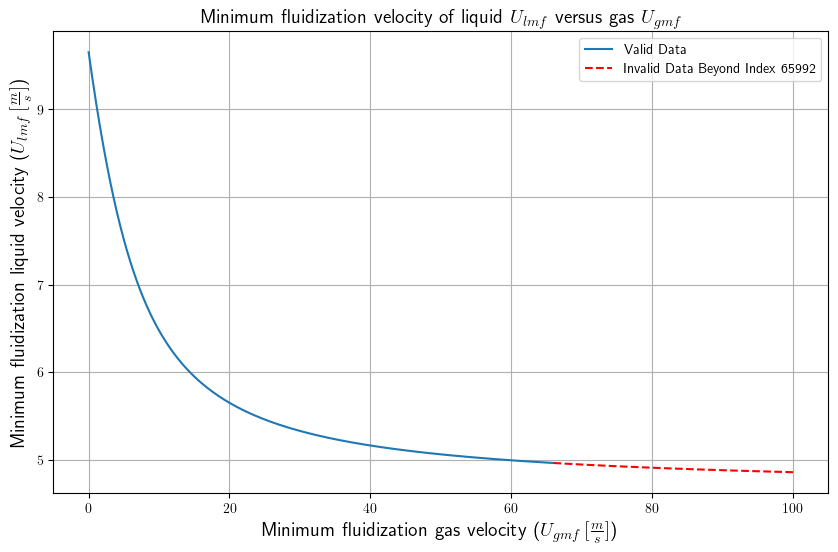

In [16]:
plt.figure(figsize=(10, 6))

# Plot valid data range
plt.plot(U_gmf_valid, U_lmf_valid, '-', label='Valid Data')

# Plot invalid data range
plt.plot(U_gmf_invalid, U_lmf_invalid, 'r--', label='Invalid Data Beyond Index 65992')

plt.xlabel(r'Minimum fluidization gas velocity ($U_{gmf} \, [\frac{m}{s}]$)', fontsize=14)
plt.ylabel(r'Minimum fluidization liquid velocity ($U_{lmf} \, [\frac{m}{s}]$)', fontsize=14)
plt.title(r'Minimum fluidization velocity of liquid $U_{lmf}$ versus gas $U_{gmf}$', fontsize=14)

plt.legend()
plt.grid(True)
plt.show()

In [17]:
valid_data_df = pd.DataFrame({
    'U_gmf (Valid Range)': U_gmf_valid,
    'U_lmf (Valid Range)': U_lmf_valid
})

In [18]:
valid_data_df.describe()

,U_gmf (Valid Range),U_lmf (Valid Range)
count,65992.000000,65992.000000
mean,33.005500,5.682090
std,19.050394,0.981001
min,0.010000,4.960937
25%,16.507750,5.063712
50%,33.005500,5.266989
75%,49.503250,5.841999
max,66.001000,9.653715


In [19]:
valid_data_df

,U_gmf (Valid Range),U_lmf (Valid Range)
0,0.010,9.653715
1,0.011,9.653137
2,0.012,9.652559
3,0.013,9.651982
4,0.014,9.651404
...,...,...
65987,65.997,4.960955
65988,65.998,4.960951
65989,65.999,4.960946
65990,66.000,4.960941


## We now update the x0 to be 67

In [20]:
x0 = 67

## Since we have also a range for particle size, we want to know how does the profile looks like given $d_p \in [1, 6] \, [mm]$ 

In [21]:
# Ranges for d_p and U_gmf
d_p_range = np.linspace(1e-3, 6e-3, 20)  # Particle diameter range [m] (20 samples)
U_gmf_range = np.linspace(x1, x0, 36)  # Minimum Fluidization gas velocity range [m/s] (36 samples)

# Initialize the result matrix
U_lmf_profile = np.zeros((len(d_p_range), len(U_gmf_range)))

for i, dp in enumerate(d_p_range):
    for j, U_gmf in enumerate(U_gmf_range):
        U_lmf_solution = secant_method(f, U_gmf, dp, rho_fluid, mu, rho_s, g, epsilon_mf, x0, x1)
        U_lmf_profile[i, j] = U_lmf_solution if U_lmf_solution is not None else np.nan


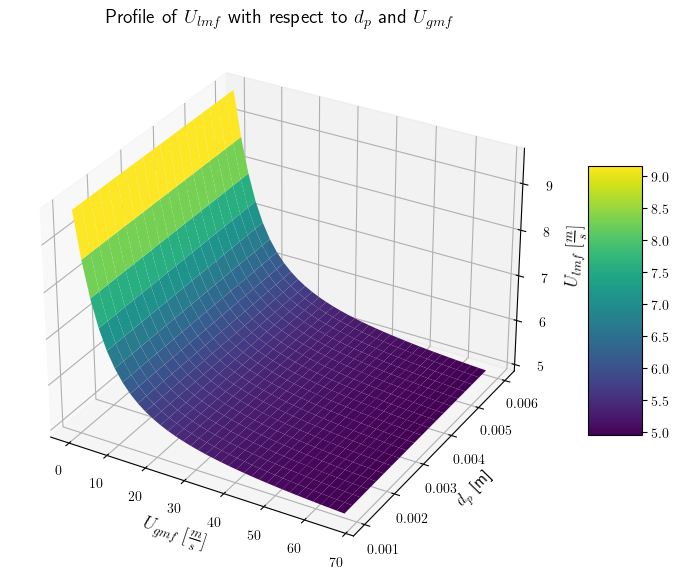

In [22]:
# Create meshgrid for plotting
D_p, U_GMF = np.meshgrid(U_gmf_range, d_p_range)

# Plot Set up
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(D_p, U_GMF, U_lmf_profile, cmap='viridis', edgecolor='none')

# Labels and titles
ax.set_xlabel(r'$U_{gmf} \, [\frac{m}{s}]$', fontsize=13)
ax.set_ylabel(r'$d_p$ [m]', fontsize=12)
ax.set_zlabel(r'$U_{lmf} \, [\frac{m}{s}]$', fontsize=13)
ax.set_title(r'Profile of $U_{lmf}$ with respect to $d_p$ and $U_{gmf}$', fontsize=14)

# Color Bar for U_lmf
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()


### From the above graph, we can easily see that particle size does not really affect the relationship between $U_{lmf}$ and $U_{gmf}$

### We will re-use this when we have determined the particle terminal velocity and the transition flow regime velocity

# References

[1]: J.-P. . Zhang, N. Epstein, and J. R. Grace, “Minimum fluidization velocities for gas—liquid—solid three-phase systems,” Powder Technology, vol. 100, no. 2–3, pp. 113–118, Dec. 1998, doi: https://doi.org/10.1016/s0032-5910(98)00131-4.


[2]: S. Ergun and A. A. Orning, “Fluid Flow through Randomly Packed Columns and Fluidized Beds,” Industrial & Engineering Chemistry, vol. 41, no. 6, pp. 1179–1184, Jun. 1949, doi: https://doi.org/10.1021/ie50474a011.

[3]: D. Kunii and O. Levenspiel, “Fluidization and Mapping of Regimes,” Fluidization Engineering, pp. 61–94, 1991, doi: https://doi.org/10.1016/b978-0-08-050664-7.50009-3.

[4]: X. L. Yang, J. P. Euzen, and G. Wild, “Study of liquid retention in fixed-bed reactors with upward flow of gas and liquid,” International Chemical Engineering (A Quarterly Journal of Translations from Russia, Eastern Europe and Asia); (United States), vol. 33:1, Jan. 1993. In: J.-P. . Zhang, N. Epstein, and J. R. Grace, “Minimum fluidization velocities for gas—liquid—solid three-phase systems,” Powder Technology, vol. 100, no. 2–3, pp. 113–118, Dec. 1998, doi: https://doi.org/10.1016/s0032-5910(98)00131-4.

[5]: C. Y. Wen and Y. H. Yu, “A generalized method for predicting the minimum fluidization velocity,” AIChE Journal, vol. 12, no. 3, pp. 610–612, May 1966, doi: https://doi.org/10.1002/aic.690120343.

[6]: L.-S. Fan, “Hydrodynamics of Cocurrent Upward Fluidized Bed Systems (Modes E-I-a-1 and E-I-b; Figure 1.3),” Elsevier eBooks, pp. 33–161, Jan. 1989, doi: https://doi.org/10.1016/b978-0-409-95179-0.50008-8.